In [1]:
from sklearn.datasets import load_digits

In [2]:
X, y = load_digits(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
y_train = ((y_train == 5) | (y_train == 8))
y_test = ((y_test == 5)| (y_test==8))

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [6]:
pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
rfcl = RandomForestClassifier()

In [9]:
param_grid = [
      {'n_estimators': [100, 200, 300, 400]}
     ]

clf = GridSearchCV(rfcl, param_grid, cv=3, scoring='roc_auc')
clf.fit(X_train_tr, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [10]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
final_model = clf.best_estimator_

In [13]:
print('The best estimator:', clf.best_params_)

The best estimator: {'n_estimators': 400}


In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


final_model.fit(X_train_tr, y_train)

y_predicted = final_model.predict_proba(X_test_tr)
y_predicted = y_predicted[:,1]
print('AUC Score for test data:', roc_auc_score(y_test, y_predicted))

AUC Score for test data: 0.9951010555213707


In [16]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_reduced = pca.fit_transform(X_train_tr)
X_train_reduced.shape

(1078, 64)

In [17]:

rfcl_2 = RandomForestClassifier()
clf_2 = GridSearchCV(rfcl_2, param_grid, cv=3, scoring='roc_auc')

for d in range(2,64,2):
    X_train_reduced_d = X_train_reduced[:,0:d]
    clf_2.fit(X_train_reduced_d, y_train)
    #print(X_train_reduced_d.shape)
    


In [18]:
final_model_2 = clf_2.best_estimator_

In [20]:
import numpy as np

d_list = []
test_auc_list  = []
for d in range(2, 64, 4):
    final_model_2 = clf_2.best_estimator_
    components = pca.components_.T[:,0:d]
    
    X_train_reduced_d = X_train_reduced[:,0:d]

    X_test_reduced = np.dot(X_test_tr, components)
    final_model_2.fit(X_train_reduced_d, y_train)

  #  Y_score = cross_val_predict(final_model_2, X_test_reduced, y_test, cv=3)
   # fpr, tpr, thresholds = roc_curve(y_test,Y_score)
    #score = auc(fpr,tpr)
    
    Y_score = final_model_2.predict_proba(X_test_reduced)
    Y_score = Y_score[:,1]
    score = roc_auc_score(y_test, Y_score)
    print(d)
    print(score)
    d_list.append(d)
    test_auc_list.append(score)

2
0.8041191366497846
6
0.9641809059497326
10
0.9869834808538837
14
0.9806290528707341
18
0.9872497278364178
22
0.9859184929237469
26
0.9864214038907558
30
0.9832264401003455
34
0.9867468168694088
38
0.985036919581578
42
0.9851197519761443
46
0.9883147157665547
50
0.9845280920149572
54
0.9876402234108014
58
0.9851966677710986
62
0.9851789179722629


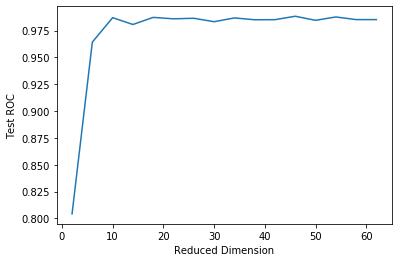

In [22]:
import matplotlib.pyplot as plt
plt.plot(d_list, test_auc_list)
plt.xlabel('Reduced Dimension')
plt.ylabel('Test ROC')
plt.show()


In [23]:
 clf_2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
!jupyter nbconvert --to script HW4_Cheekati_SaiPriya.ipynb

[NbConvertApp] Converting notebook HW4_Cheekati_SaiPriya.ipynb to script
[NbConvertApp] Writing 3053 bytes to HW4_Cheekati_SaiPriya.py
